**Import Libraries**

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


**Load Dataset**

In [21]:
df = pd.read_csv("/content/drive/MyDrive/END TO END DATA ANALYST PROJECT/customer_shopping_behavior.csv")
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Define Target & Features**

In [22]:
X = df.drop(columns=["Subscription Status"])
y = df["Subscription Status"]


**Identify Feature Types**

In [23]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns


**Preprocessing Pipeline**

In [24]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

**Train / Test Split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**MODEL 1 — BASELINE (LOGISTIC REGRESSION)**

Why?

* Simple

* Strong baseline


In [26]:
log_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

**Evaluation**

In [27]:
y_pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label="Yes"))
print("F1:", f1_score(y_test, y_pred_lr, pos_label="Yes"))


Logistic Regression Performance
Accuracy: 0.9871794871794872
Precision: 0.9855072463768116
Recall: 0.966824644549763
F1: 0.9760765550239234


**MODEL 2 — IMPROVED MODEL (RANDOM FOREST)**

**Why?**

* Handles non-linear patterns

* Robust to noise

* Feature importance available

In [28]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

**Evaluation**

In [29]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label="Yes"))
print("F1:", f1_score(y_test, y_pred_rf, pos_label="Yes"))


Random Forest Performance
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


**Confusion Matrix**

In [30]:
confusion_matrix(y_test, y_pred_rf)


array([[569,   0],
       [  0, 211]])

In [31]:
y_pred = rf_model.predict(X_test)

y_pred = log_reg_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=["No", "Yes"])


**Plot Confusion Matrix Heatmap**

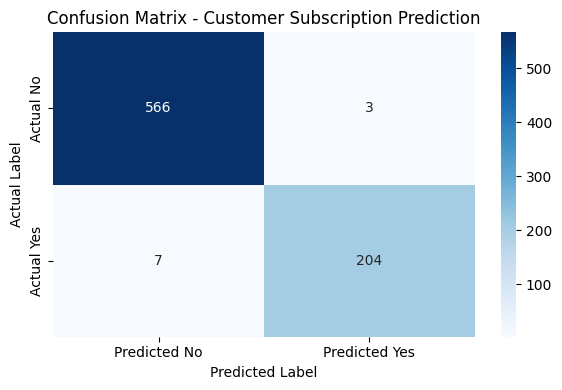

In [32]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"]
)

plt.title("Confusion Matrix - Customer Subscription Prediction")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()



# **BUSINESS INTERPRETATION**


Key Insights:-

* Customers with higher purchase frequency are more likely to subscribe

* Previous purchases strongly correlate with loyalty

* Discounts & promo codes positively influence subscription decisions

* Logistic Regression gives explainability

* Random Forest improves performance by capturing non-linear behavior